In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
import os
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import keras

In [2]:
train_data_path="/Users/madhurabhagat/Downloads/chest_xray/train"
test_data_path="/Users/madhurabhagat/Downloads/chest_xray/test"

(2583, 2916)


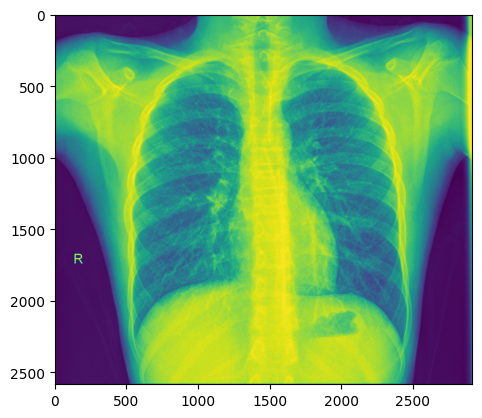

In [3]:
img_path="/Users/madhurabhagat/Downloads/chest_xray/train/NORMAL/NORMAL-9990348-0001.jpeg"
img=mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.show()

In [4]:
print(img.ndim)

2


In [5]:
img_pil = Image.open(img_path).convert("RGB") 
img_array = np.array(img_pil) 
print(img_array.shape) 

(2583, 2916, 3)


In [6]:
img_size=224
batch_size=32

In [7]:
train_datagen=ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,
    validation_split=0.2 
)

In [8]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",  
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    subset="validation"
)

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.


In [10]:
test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False
)

Found 624 images belonging to 2 classes.


In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5), 
    Dense(1, activation='sigmoid') 
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.7779 - loss: 0.4690 - val_accuracy: 0.8258 - val_loss: 0.3419
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 177s 1s/step - accuracy: 0.8597 - loss: 0.3228 - val_accuracy: 0.8833 - val_loss: 0.3032
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.8651 - loss: 0.3196 - val_accuracy: 0.8766 - val_loss: 0.2753
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.8810 - loss: 0.2815 - val_accuracy: 0.8517 - val_loss: 0.3070
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - accuracy: 0.8893 - loss: 0.2764 - val_accuracy: 0.9053 - val_loss: 0.2259
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.8876 - loss: 0.2547 - val_accuracy: 0.8986 - val_loss: 0.2352
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.8942 - loss: 0.2419 - val_accuracy: 0.9062 - val_loss: 0.2344
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 183s 1s/step - accuracy: 0.9067 - loss: 0.2225 - val_accuracy: 0.911

In [13]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step - accuracy: 0.8742 - loss: 0.3091
Test Accuracy: 0.90


20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 353ms/step


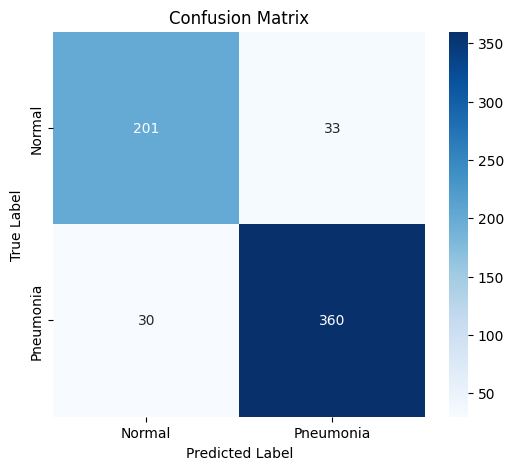

In [14]:
import seaborn as sns
true_labels = test_generator.classes 
predictions = model.predict(test_generator)
predicted_labels = (predictions > 0.5).astype(int) 
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
print(classification_report(true_labels, predicted_labels, target_names=["Normal", "Pneumonia"]))

              precision    recall  f1-score   support

      Normal       0.87      0.86      0.86       234
   Pneumonia       0.92      0.92      0.92       390

    accuracy                           0.90       624
   macro avg       0.89      0.89      0.89       624
weighted avg       0.90      0.90      0.90       624



In [18]:
import cv2
def predict_image(image_path, model, label_mapping):
    input_img = cv2.imread(image_path)
    input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)
    plt.imshow(input_img_rgb)
    plt.axis("off")
    plt.show()
    img_size = model.input_shape[1]
    input_img_resize = cv2.resize(input_img_rgb, (img_size, img_size)) / 255.0
    img_reshaped = np.expand_dims(input_img_resize, axis=0)
    img_pred = model.predict(img_reshaped)
    img_pred_label = np.argmax(img_pred)
    class_name = label_mapping.get(img_pred_label, "Unknown")
    print("Predicted Label:", class_name)

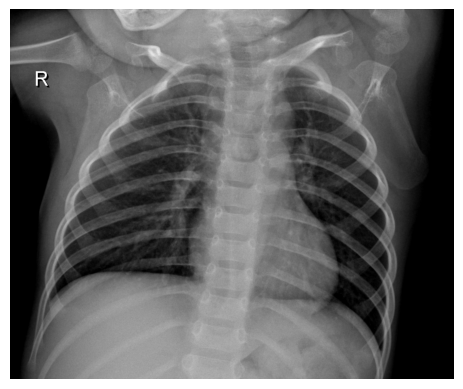

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Predicted Label: Normal


In [22]:
label_mapping = {0: "Normal", 1: "Pneumonia"}
img_input = "/Users/madhurabhagat/Downloads/chest_xray/train/NORMAL/NORMAL-9989984-0001.jpeg"
predict_image(img_input, model, label_mapping)